# Proyek Akhir Machine Learning: Sistem Rekomendasi Film

- **Nama:** Alif Nurhidayat
- **Email:** alifnurhidayatwork@gmail.com | mc189d5y0351@student.devacademy.id
- **ID Dicoding:** Alif Nurhidayat | MC189D5Y0351

## Pendahuluan
Proyek ini bertujuan untuk membangun model sistem rekomendasi film. Sistem rekomendasi adalah sebuah sistem yang memprediksi preferensi pengguna terhadap suatu item (dalam kasus ini, film) dan memberikan rekomendasi item yang paling sesuai. Dalam proyek ini, akan diimplementasikan dua jenis pendekatan utama dalam sistem rekomendasi: *Content-Based Filtering* dan *Collaborative Filtering*.

## 1. Business Understanding

### 1.1. Latar Belakang Proyek

Di era digital saat ini, jumlah konten yang tersedia bagi pengguna, seperti film, musik, berita, dan produk, sangatlah melimpah. Hal ini seringkali membuat pengguna kesulitan untuk menemukan item yang benar-benar mereka sukai atau butuhkan. Sistem rekomendasi hadir sebagai solusi untuk membantu pengguna menavigasi lautan informasi ini dengan menyajikan pilihan-pilihan yang paling relevan secara personal.

Dalam konteks industri perfilman dan platform streaming, sistem rekomendasi memainkan peran krusial. Dengan merekomendasikan film yang tepat, platform dapat meningkatkan kepuasan pengguna, memperpanjang waktu interaksi pengguna dengan platform (*engagement*), dan pada akhirnya meningkatkan retensi pengguna serta potensi pendapatan. Rekomendasi yang akurat membantu pengguna menemukan film baru yang mungkin mereka lewatkan, serta menemukan kembali film lama yang sesuai dengan selera mereka.

Proyek ini penting untuk diselesaikan karena memberikan pemahaman praktis tentang bagaimana membangun sistem rekomendasi dari awal hingga akhir, mencakup pemrosesan data, implementasi algoritma, hingga evaluasi. Keterampilan ini sangat relevan di berbagai industri yang mengandalkan personalisasi untuk meningkatkan pengalaman pengguna.

### 1.2. Problem Statements

Berdasarkan latar belakang di atas, permasalahan yang ingin diselesaikan dalam proyek ini adalah:
1. Bagaimana cara membangun sistem rekomendasi film yang dapat memberikan rekomendasi berdasarkan kemiripan konten film (misalnya, genre, deskripsi)? (*Content-Based Filtering*)
2. Bagaimana cara membangun sistem rekomendasi film yang dapat memberikan rekomendasi berdasarkan pola preferensi pengguna lain yang memiliki selera serupa? (*Collaborative Filtering*)
3. Fitur-fitur apa saja dari film (misalnya, genre) yang paling berpengaruh dalam menentukan kemiripan antar film untuk pendekatan *content-based*?
4. Bagaimana mengevaluasi performa dari kedua jenis sistem rekomendasi yang dibangun?

### 1.3. Goals

Tujuan utama dari proyek ini adalah:
1. Mengembangkan model *Content-Based Filtering* yang mampu merekomendasikan film berdasarkan kemiripan atribut film (genre).
2. Mengembangkan model *Collaborative Filtering* (user-based atau item-based) yang mampu merekomendasikan film berdasarkan histori rating pengguna.
3. Menghasilkan daftar top-N rekomendasi film untuk pengguna tertentu menggunakan kedua pendekatan tersebut.
4. Menganalisis dan membandingkan (secara kualitatif atau jika memungkinkan, kuantitatif sederhana) hasil rekomendasi dari kedua pendekatan.

### 1.4. Solution Approach

Untuk mencapai tujuan-tujuan tersebut, pendekatan solusi yang akan diimplementasikan adalah sebagai berikut:

1.  **Content-Based Filtering:**
    * Menggunakan fitur genre film sebagai dasar untuk menentukan kemiripan antar film.
    * Menerapkan teknik TF-IDF (Term Frequency-Inverse Document Frequency) pada genre film untuk membuat representasi vektor dari setiap film.
    * Menghitung kemiripan antar film menggunakan metrik *cosine similarity* berdasarkan vektor TF-IDF genre.
    * Membuat fungsi yang dapat memberikan rekomendasi top-N film yang paling mirip dengan film yang disukai pengguna atau film yang terakhir ditonton.

2.  **Collaborative Filtering:**
    * Menggunakan data rating yang diberikan oleh pengguna terhadap film.
    * Menerapkan algoritma *Singular Value Decomposition (SVD)* atau *K-Nearest Neighbors (KNN)* untuk memprediksi rating yang mungkin diberikan pengguna terhadap film yang belum mereka tonton, atau untuk menemukan pengguna/item yang serupa.
    * Membuat fungsi yang dapat memberikan rekomendasi top-N film berdasarkan prediksi rating tertinggi atau berdasarkan item yang paling sering dirating tinggi oleh pengguna serupa.

Kedua pendekatan ini akan diimplementasikan secara terpisah dan hasilnya dapat dibandingkan untuk melihat jenis rekomendasi yang dihasilkan oleh masing-masing metode.

## 2. Data Understanding & Preparation

### 2.1. Impor Library yang Dibutuhkan
Langkah pertama adalah mengimpor semua library Python yang akan digunakan dalam proyek ini.

In [1]:
# 1. Atur versi NumPy yang kompatibel dengan scikit-surprise dan thinc/spacy versi lama
# Pastikan ini dijalankan di sel terpisah dan kernel di-restart jika diminta atau jika ada masalah.
%pip install 'numpy<2.0' -q

# Penting: Setelah instalasi numpy, restart kernel jika ini adalah perubahan versi numpy yang signifikan.
# Kemudian jalankan sel impor numpy dan sel berikutnya.

# Impor numpy setelah potensi restart untuk memastikan versi yang benar dimuat.
import numpy as np
print(f"NumPy version set to: {np.__version__}")

# 2. Instal scikit-surprise (membutuhkan numpy < 2.0)
%pip install scikit-surprise -q
print("scikit-surprise installed.")

# 3. Instal versi spacy yang kompatibel dengan numpy < 2.0
# spacy <= 3.7.5 (misalnya, spacy 3.7.5) akan menarik thinc versi < 8.3.0,
# yang kompatibel dengan numpy < 2.0.
# Perintah ini akan menangani versi thinc yang sesuai secara otomatis.
%pip install 'spacy<=3.7.5' -q
print("Compatible spacy version installed (aiming for <=3.7.5).")

# 4. Instal pustaka kaggle untuk mengunduh dataset
%pip install kaggle -q
print("kaggle installed.")

# 5. Impor semua pustaka
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Coba impor spacy untuk memverifikasi instalasi jika memang digunakan dalam kode Anda
try:
    import spacy
    print(f"spaCy version: {spacy.__version__}")
except ImportError:
    print("spaCy tidak diimpor dalam skrip ini, tetapi dependensinya telah coba dikelola.")
except Exception as e:
    print(f"Error saat mengimpor atau menggunakan spacy: {e}")


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import accuracy

# Verifikasi versi thinc dan numpy pada akhirnya
try:
    import thinc
    print(f"thinc version: {thinc.__version__}")
except ImportError:
    print("thinc tidak terinstal atau tidak ditemukan setelah operasi.")

print(f"NumPy version at the end: {np.__version__}") # Pastikan ini masih < 2.0
print(" ")
print("="*50)
print("PERIKSA OUTPUT DI ATAS UNTUK PESAN ERROR INSTALASI.")
print("Pastikan Anda TELAH MEMULAI ULANG KERNEL/RUNTIME jika ada perubahan instalasi besar (seperti downgrade NumPy).")
print("Jika semua berjalan lancar, versi NumPy harus < 2.0, dan thinc serta spacy harus versi yang kompatibel.")
print("="*50)

NumPy version set to: 1.26.4
scikit-surprise installed.
Compatible spacy version installed (aiming for <=3.7.5).
kaggle installed.
spaCy version: 3.7.5
thinc version: 8.2.5
NumPy version at the end: 1.26.4
 
PERIKSA OUTPUT DI ATAS UNTUK PESAN ERROR INSTALASI.
Pastikan Anda TELAH MEMULAI ULANG KERNEL/RUNTIME jika ada perubahan instalasi besar (seperti downgrade NumPy).
Jika semua berjalan lancar, versi NumPy harus < 2.0, dan thinc serta spacy harus versi yang kompatibel.


### 2.2. Pengaturan API Kaggle
Untuk mengunduh dataset langsung dari Kaggle, kita perlu melakukan setup API Kaggle. Unggah file `kaggle.json` Anda.

In [2]:
from google.colab import files

# Pastikan file kaggle.json sudah diunggah ke Colab
if not os.path.exists("/root/.kaggle/kaggle.json"):
    print("Unggah file kaggle.json Anda:")
    uploaded = files.upload()
    if "kaggle.json" in uploaded:
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
        print("kaggle.json berhasil diunggah dan permission disetel.")
    else:
        print("Peringatan: File kaggle.json tidak ditemukan dalam unggahan.")
else:
    print("File kaggle.json sudah ada.")

Unggah file kaggle.json Anda:


Saving kaggle.json to kaggle.json
kaggle.json berhasil diunggah dan permission disetel.


### 2.3. Pengunduhan dan Pemuatan Dataset
Dataset yang akan digunakan adalah "MovieLens Small Dataset" yang berisi rating film dan metadata film. Dataset ini terdiri dari beberapa file, namun kita akan fokus pada `movies.csv` dan `ratings.csv`.

**Tautan Sumber Data:** [https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset](https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset)

In [3]:
DATASET_NAME = "shubhammehta21/movie-lens-small-latest-dataset"
DATA_PATH = "./movielens-small/"

if not os.path.exists(DATA_PATH):
    print(f"--- Mengunduh Dataset: {DATASET_NAME} dari Kaggle ---")
    !kaggle datasets download -d {DATASET_NAME} -p {DATA_PATH} --unzip
    print(f"Dataset berhasil diunduh dan diekstrak ke {DATA_PATH}")
else:
    print(f"Dataset sudah ada di {DATA_PATH}")

# Memuat data
try:
    movies_df = pd.read_csv(os.path.join(DATA_PATH, 'movies.csv'))
    ratings_df = pd.read_csv(os.path.join(DATA_PATH, 'ratings.csv'))
    print("\nDataset berhasil dimuat ke DataFrame.")
except FileNotFoundError:
    print("Error: Pastikan file movies.csv dan ratings.csv ada di dalam direktori dataset setelah diunduh.")
    # Coba path alternatif jika struktur direktori berbeda setelah unzip
    alt_data_path = "./"
    try:
        movies_df = pd.read_csv(os.path.join(alt_data_path, 'movies.csv'))
        ratings_df = pd.read_csv(os.path.join(alt_data_path, 'ratings.csv'))
        print("\nDataset berhasil dimuat dari path alternatif.")
        DATA_PATH = alt_data_path # Update DATA_PATH jika berhasil
    except FileNotFoundError:
        print("Error: File dataset tidak ditemukan. Harap periksa path dan pastikan dataset sudah diunduh dengan benar.")
        movies_df = pd.DataFrame() # Inisialisasi DataFrame kosong untuk menghindari error lebih lanjut
        ratings_df = pd.DataFrame()

print("\n")

--- Mengunduh Dataset: shubhammehta21/movie-lens-small-latest-dataset dari Kaggle ---
Dataset URL: https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset
License(s): unknown
  0% 0.00/971k [00:00<?, ?B/s]
100% 971k/971k [00:00<00:00, 731MB/s]
Dataset berhasil diunduh dan diekstrak ke ./movielens-small/

Dataset berhasil dimuat ke DataFrame.




### 2.4. Inspeksi Data Awal
Melihat beberapa baris pertama, informasi umum, dan statistik deskriptif dari dataset.

In [4]:
if not movies_df.empty and not ratings_df.empty:
    print("--- 5 Baris Pertama Data Movies ---")
    print(movies_df.head())
    print("\n")

    print("--- Informasi Dataset Movies ---")
    movies_df.info()
    print("\n")

    print("--- Statistik Deskriptif Movies (jika ada kolom numerik) ---")
    print(movies_df.describe(include='all'))
    print("\n")

    print("--- 5 Baris Pertama Data Ratings ---")
    print(ratings_df.head())
    print("\n")

    print("--- Informasi Dataset Ratings ---")
    ratings_df.info()
    print("\n")

    print("--- Statistik Deskriptif Ratings ---")
    print(ratings_df.describe(include='all'))
    print("\n")

    print(f"Jumlah film unik: {movies_df['movieId'].nunique()}")
    print(f"Jumlah pengguna unik: {ratings_df['userId'].nunique()}")
    print(f"Jumlah total rating: {len(ratings_df)}")
    print(f"Rentang nilai rating: {ratings_df['rating'].min()} - {ratings_df['rating'].max()}")
else:
    print("DataFrame kosong, inspeksi data tidak dapat dilakukan.")

--- 5 Baris Pertama Data Movies ---
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


--- Informasi Dataset Movies ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 2

**Uraian Variabel/Fitur pada Data:**

**movies.csv:**
* `movieId`: ID unik untuk setiap film (Numerik, Identifier).
* `title`: Judul film, beserta tahun rilis dalam tanda kurung (Teks, Kategorikal).
* `genres`: Genre film, dipisahkan oleh pipa `|` (Teks, Kategorikal).

**ratings.csv:**
* `userId`: ID unik untuk setiap pengguna (Numerik, Identifier).
* `movieId`: ID unik untuk setiap film yang dirating (Numerik, Identifier, Foreign Key ke movies.csv).
* `rating`: Rating yang diberikan pengguna untuk film, dalam skala 0.5 hingga 5.0 (Numerik, Target untuk Collaborative Filtering).
* `timestamp`: Waktu pemberian rating (Numerik, tidak akan digunakan secara langsung dalam model ini).

### 2.5. Penanganan Missing Values dan Duplikat
Memeriksa dan menangani nilai yang hilang atau data duplikat.

In [5]:
if not movies_df.empty and not ratings_df.empty:
    print("--- Missing Values Movies ---")
    print(movies_df.isnull().sum())
    print("\n")

    print("--- Missing Values Ratings ---")
    print(ratings_df.isnull().sum())
    print("\n")

    # Penanganan (jika ada, dataset ini umumnya bersih)
    # movies_df.dropna(inplace=True) # Contoh jika ingin menghapus baris dengan NaN

    print("--- Duplicated Data Movies ---")
    print(f"Jumlah duplikat di movies_df: {movies_df.duplicated().sum()}")
    movies_df.drop_duplicates(inplace=True)
    print("\n")

    print("--- Duplicated Data Ratings ---")
    print(f"Jumlah duplikat di ratings_df: {ratings_df.duplicated().sum()}")
    ratings_df.drop_duplicates(inplace=True)
    print("\n")
else:
    print("DataFrame kosong, penanganan missing values dan duplikat tidak dapat dilakukan.")

--- Missing Values Movies ---
movieId    0
title      0
genres     0
dtype: int64


--- Missing Values Ratings ---
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


--- Duplicated Data Movies ---
Jumlah duplikat di movies_df: 0


--- Duplicated Data Ratings ---
Jumlah duplikat di ratings_df: 0




### 2.6. Analisis Data Eksploratif (EDA) dengan Visualisasi
Memvisualisasikan data untuk mendapatkan insight.

<ipython-input-6-49e9ee2e5fd3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='viridis')


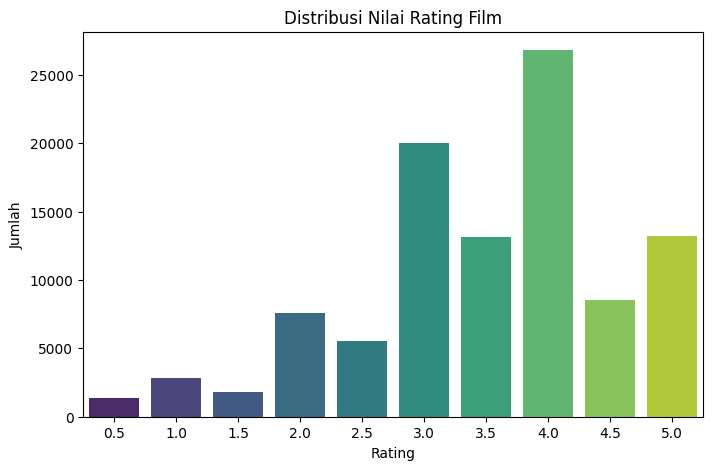

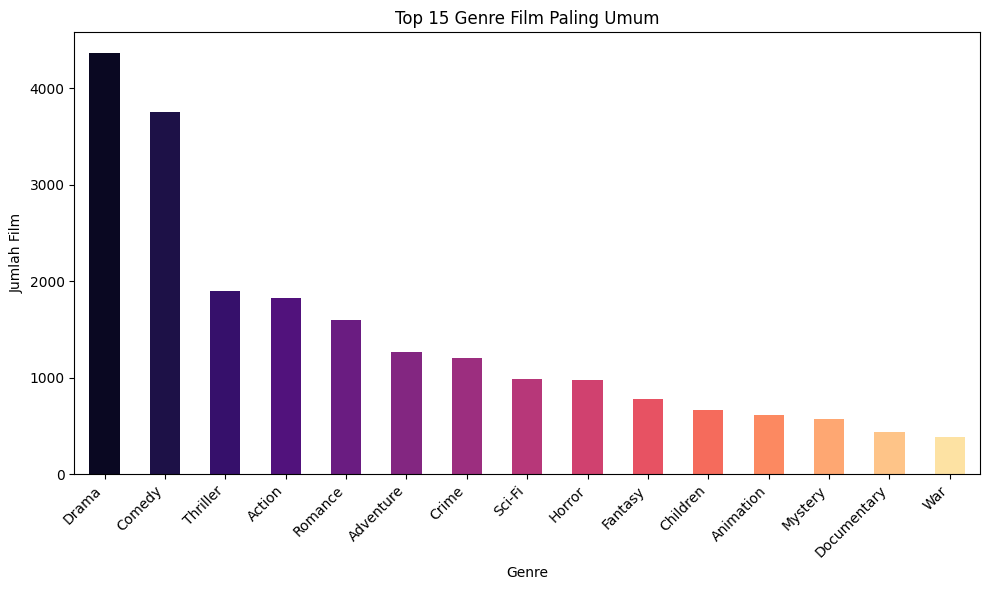

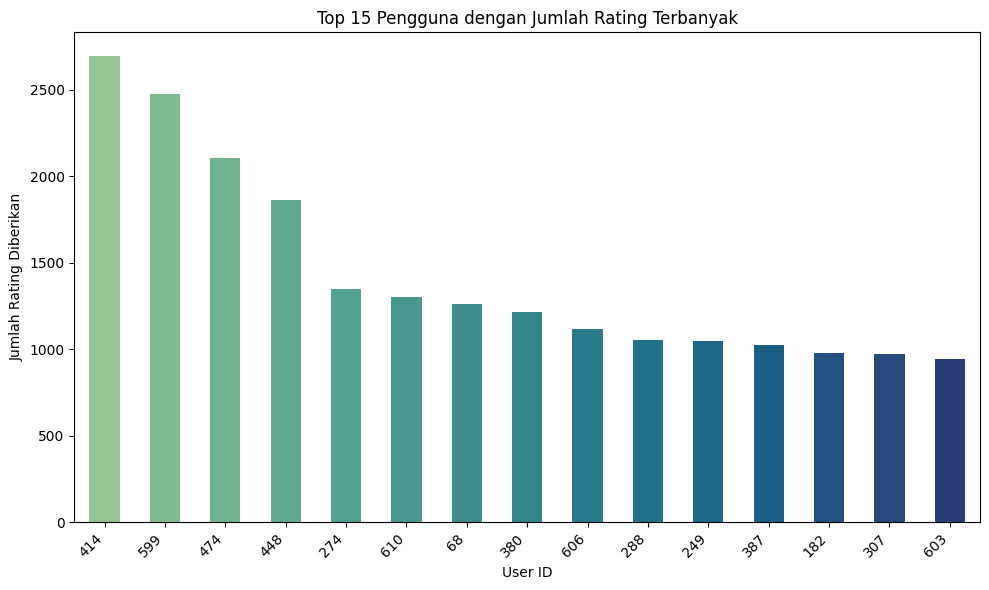

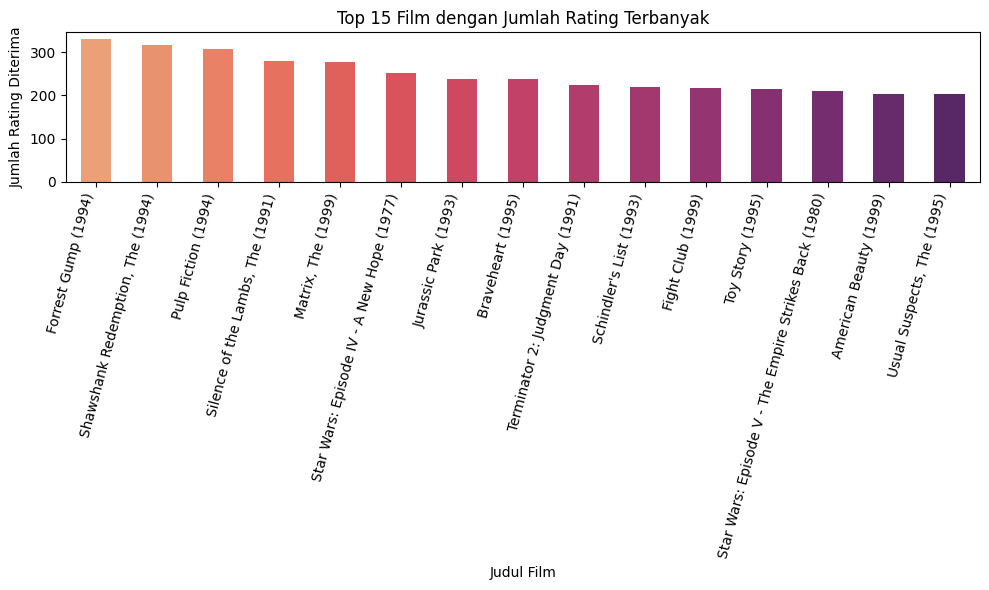

In [6]:
if not movies_df.empty and not ratings_df.empty:
    # Distribusi Rating
    plt.figure(figsize=(8, 5))
    sns.countplot(x='rating', data=ratings_df, palette='viridis')
    plt.title('Distribusi Nilai Rating Film', fontsize=12)
    plt.xlabel('Rating', fontsize=10)
    plt.ylabel('Jumlah', fontsize=10)
    plt.show()
    print("\n")

    # Jumlah Film per Genre (Top 15)
    # Memisahkan genre dan menghitung frekuensinya
    genre_counts = movies_df['genres'].str.split('|', expand=True).stack().value_counts()
    plt.figure(figsize=(10, 6))
    genre_counts.head(15).plot(kind='bar', color=sns.color_palette('magma', 15))
    plt.title('Top 15 Genre Film Paling Umum', fontsize=12)
    plt.xlabel('Genre', fontsize=10)
    plt.ylabel('Jumlah Film', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print("\n")

    # Distribusi Jumlah Rating per Pengguna (Top 15 Pengguna Paling Aktif)
    user_rating_counts = ratings_df['userId'].value_counts()
    plt.figure(figsize=(10, 6))
    user_rating_counts.head(15).plot(kind='bar', color=sns.color_palette('crest', 15))
    plt.title('Top 15 Pengguna dengan Jumlah Rating Terbanyak', fontsize=12)
    plt.xlabel('User ID', fontsize=10)
    plt.ylabel('Jumlah Rating Diberikan', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print("\n")

    # Distribusi Jumlah Rating per Film (Top 15 Film Paling Banyak Dirating)
    movie_rating_counts = ratings_df['movieId'].value_counts()
    # Gabungkan dengan judul film untuk tampilan yang lebih baik
    movie_rating_counts_with_titles = movie_rating_counts.to_frame().merge(movies_df[['movieId', 'title']], on='movieId', how='left')
    movie_rating_counts_with_titles.set_index('title', inplace=True)

    plt.figure(figsize=(10, 6))
    movie_rating_counts_with_titles['count'].head(15).plot(kind='bar', color=sns.color_palette('flare', 15))
    plt.title('Top 15 Film dengan Jumlah Rating Terbanyak', fontsize=12)
    plt.xlabel('Judul Film', fontsize=10)
    plt.ylabel('Jumlah Rating Diterima', fontsize=10)
    plt.xticks(rotation=75, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame kosong, EDA tidak dapat dilakukan.")

**Insight dari EDA:**
* Distribusi rating menunjukkan bahwa pengguna cenderung memberikan rating yang lebih tinggi (3.0 ke atas).
* Genre seperti Drama, Comedy, Thriller, dan Action adalah yang paling umum.
* Ada variasi dalam jumlah rating yang diberikan oleh pengguna dan diterima oleh film, menunjukkan beberapa pengguna lebih aktif dan beberapa film lebih populer.

## 3. Modeling: Content-Based Filtering
Pendekatan ini merekomendasikan item berdasarkan kemiripan atribut item tersebut dengan item yang disukai pengguna di masa lalu. Kita akan menggunakan genre film.

### 3.1. TF-IDF Vectorizer pada Genre
Mengubah data genre menjadi representasi numerik menggunakan TF-IDF.

In [7]:
if not movies_df.empty:
    # Mengganti '|' dengan spasi agar setiap genre dianggap sebagai kata terpisah
    movies_df_cb = movies_df.copy()
    movies_df_cb['genres_processed'] = movies_df_cb['genres'].str.replace('|', ' ')

    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(movies_df_cb['genres_processed'])

    print("Bentuk matriks TF-IDF:", tfidf_matrix.shape)
    # Menampilkan sebagian fitur (genre) yang dihasilkan oleh TF-IDF
    print("Contoh fitur (genre) dari TF-IDF:", tfidf.get_feature_names_out()[:20])
    print("\n")
else:
    print("DataFrame movies_df kosong, TF-IDF tidak dapat dihitung.")
    tfidf_matrix = None # Inisialisasi untuk menghindari error

Bentuk matriks TF-IDF: (9742, 24)
Contoh fitur (genre) dari TF-IDF: ['action' 'adventure' 'animation' 'children' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'fi' 'film' 'genres' 'horror' 'imax'
 'listed' 'musical' 'mystery' 'no' 'noir' 'romance']




### 3.2. Menghitung Cosine Similarity
Menghitung kemiripan antar film berdasarkan vektor TF-IDF genre.

In [8]:
if tfidf_matrix is not None:
    cosine_sim_genre = cosine_similarity(tfidf_matrix, tfidf_matrix)
    print("Bentuk matriks Cosine Similarity:", cosine_sim_genre.shape)
    print("Contoh matriks Cosine Similarity (5x5 pertama):")
    print(pd.DataFrame(cosine_sim_genre[:5, :5]))
    print("\n")

    # Membuat Series untuk mencocokkan judul film dengan indeksnya
    indices_cb = pd.Series(movies_df_cb.index, index=movies_df_cb['title']).drop_duplicates()
else:
    print("Matriks TF-IDF kosong, Cosine Similarity tidak dapat dihitung.")
    cosine_sim_genre = None
    indices_cb = pd.Series()

Bentuk matriks Cosine Similarity: (9742, 9742)
Contoh matriks Cosine Similarity (5x5 pertama):
          0         1         2         3         4
0  1.000000  0.813578  0.152769  0.135135  0.267586
1  0.813578  1.000000  0.000000  0.000000  0.000000
2  0.152769  0.000000  1.000000  0.884571  0.570915
3  0.135135  0.000000  0.884571  1.000000  0.505015
4  0.267586  0.000000  0.570915  0.505015  1.000000




### 3.3. Fungsi Rekomendasi Content-Based
Membuat fungsi untuk mendapatkan rekomendasi film berdasarkan kemiripan genre.

In [9]:
def get_recommendations_content_based(title, cosine_sim=cosine_sim_genre, df=movies_df_cb, indices=indices_cb, top_n=10):
    """
    Fungsi ini merekomendasikan film berdasarkan kemiripan genre (cosine similarity).
    """
    if cosine_sim is None or indices.empty:
        print("Model Content-Based belum siap.")
        return pd.DataFrame()

    try:
        # Mendapatkan indeks film yang cocok dengan judul
        idx = indices[title]
        if isinstance(idx, pd.Series): # Jika ada judul duplikat, ambil yang pertama
            idx = idx.iloc[0]
    except KeyError:
        print(f"Film dengan judul '{title}' tidak ditemukan.")
        # Coba cari judul yang mirip jika tidak ditemukan persis
        similar_titles = [t for t in indices.index if title.lower() in t.lower()]
        if similar_titles:
            print(f"Mungkin maksud Anda: {similar_titles[:5]}?")
        return pd.DataFrame()

    # Mendapatkan skor kemiripan dari semua film dengan film tersebut
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan film berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mendapatkan skor dari N film paling mirip (tidak termasuk film itu sendiri, jadi mulai dari indeks 1)
    sim_scores = sim_scores[1:top_n+1]

    # Mendapatkan indeks film
    movie_indices = [i[0] for i in sim_scores]

    # Mengembalikan N film paling mirip
    recommendations = df[['title', 'genres']].iloc[movie_indices].copy()
    recommendations['similarity_score'] = [round(i[1], 3) for i in sim_scores]
    return recommendations

print("Fungsi rekomendasi Content-Based berhasil dibuat.")

Fungsi rekomendasi Content-Based berhasil dibuat.


### 3.4. Contoh Penggunaan Rekomendasi Content-Based
Mencoba fungsi rekomendasi dengan beberapa judul film.

In [10]:
if not movies_df.empty and cosine_sim_genre is not None:
    # Pilih beberapa film acak untuk diuji atau film populer
    example_movie_1 = "Toy Story (1995)"
    example_movie_2 = "Jumanji (1995)"
    example_movie_3 = "Heat (1995)"

    print(f"--- Rekomendasi untuk '{example_movie_1}' ---")
    recommendations1 = get_recommendations_content_based(example_movie_1)
    if not recommendations1.empty:
        print(recommendations1)
    print("\n")

    print(f"--- Rekomendasi untuk '{example_movie_2}' ---")
    recommendations2 = get_recommendations_content_based(example_movie_2)
    if not recommendations2.empty:
        print(recommendations2)
    print("\n")

    print(f"--- Rekomendasi untuk '{example_movie_3}' ---")
    recommendations3 = get_recommendations_content_based(example_movie_3)
    if not recommendations3.empty:
        print(recommendations3)
else:
    print("Model Content-Based belum siap untuk memberikan rekomendasi.")

--- Rekomendasi untuk 'Toy Story (1995)' ---
                                                  title  \
1706                                        Antz (1998)   
2355                                 Toy Story 2 (1999)   
2809     Adventures of Rocky and Bullwinkle, The (2000)   
3000                   Emperor's New Groove, The (2000)   
3568                              Monsters, Inc. (2001)   
6194                                   Wild, The (2006)   
6486                             Shrek the Third (2007)   
6948                     Tale of Despereaux, The (2008)   
7760  Asterix and the Vikings (Astérix et les Viking...   
8219                                       Turbo (2013)   

                                           genres  similarity_score  
1706  Adventure|Animation|Children|Comedy|Fantasy               1.0  
2355  Adventure|Animation|Children|Comedy|Fantasy               1.0  
2809  Adventure|Animation|Children|Comedy|Fantasy               1.0  
3000  Adventure|Animation

## 4. Modeling: Collaborative Filtering
Pendekatan ini merekomendasikan item berdasarkan kemiripan preferensi antar pengguna (user-based) atau kemiripan antar item berdasarkan bagaimana pengguna meratingnya (item-based). Kita akan menggunakan library `Surprise` untuk implementasi SVD.

### 4.1. Persiapan Data untuk Surprise
Library `Surprise` memerlukan format data tertentu. Kita perlu mendefinisikan `Reader` untuk skala rating dan memuat data dari DataFrame.

In [11]:
if not ratings_df.empty:
    reader = Reader(rating_scale=(0.5, 5.0))
    data_surprise = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

    # Membagi data menjadi train set dan test set
    trainset_surprise, testset_surprise = surprise_train_test_split(data_surprise, test_size=0.2, random_state=42)
    print("Data berhasil dipersiapkan untuk library Surprise.")
    print(f"Jumlah data latih Surprise: {trainset_surprise.n_ratings}")
    print(f"Jumlah data uji Surprise: {len(testset_surprise)}")
    print("\n")
else:
    print("DataFrame ratings_df kosong, data untuk Surprise tidak dapat dipersiapkan.")
    trainset_surprise = None
    testset_surprise = []

Data berhasil dipersiapkan untuk library Surprise.
Jumlah data latih Surprise: 80668
Jumlah data uji Surprise: 20168




### 4.2. Melatih Model SVD (Singular Value Decomposition)
SVD adalah salah satu algoritma *matrix factorization* yang populer untuk collaborative filtering.

In [12]:
if trainset_surprise is not None:
    svd_model = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02, random_state=42)
    print("Melatih model SVD...")
    svd_model.fit(trainset_surprise)
    print("Model SVD berhasil dilatih.")
    print("\n")

    # Evaluasi model pada test set
    predictions_svd = svd_model.test(testset_surprise)
    rmse_svd = accuracy.rmse(predictions_svd)
    mae_svd = accuracy.mae(predictions_svd)
    print(f"SVD - RMSE: {rmse_svd:.4f}, MAE: {mae_svd:.4f}")
else:
    print("Trainset Surprise kosong, model SVD tidak dapat dilatih.")
    svd_model = None
    predictions_svd = []

Melatih model SVD...
Model SVD berhasil dilatih.


RMSE: 0.8807
MAE:  0.6766
SVD - RMSE: 0.8807, MAE: 0.6766


### 4.3. Fungsi Rekomendasi Collaborative Filtering (SVD)
Membuat fungsi untuk mendapatkan top-N rekomendasi film untuk pengguna tertentu berdasarkan prediksi rating dari model SVD.

In [13]:
def get_top_n_recommendations_svd(user_id, svd_model, movies_df, ratings_df, n=10):
    """
    Fungsi ini merekomendasikan top-N film untuk pengguna tertentu menggunakan model SVD.
    """
    if svd_model is None or movies_df.empty or ratings_df.empty:
        print("Model SVD atau DataFrame belum siap.")
        return pd.DataFrame()

    # Dapatkan daftar semua movieId
    all_movie_ids = movies_df['movieId'].unique()

    # Dapatkan daftar film yang sudah dirating oleh pengguna
    rated_movie_ids = ratings_df[ratings_df['userId'] == user_id]['movieId'].unique()

    # Dapatkan daftar film yang belum dirating oleh pengguna
    unrated_movie_ids = np.setdiff1d(all_movie_ids, rated_movie_ids)

    # Prediksi rating untuk film yang belum dirating
    test_set_for_user = [[user_id, movie_id, 0] for movie_id in unrated_movie_ids] # rating aktual (0) tidak digunakan
    predictions = svd_model.test(test_set_for_user)

    # Urutkan prediksi berdasarkan estimasi rating tertinggi
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Ambil top-N rekomendasi
    top_n_preds = predictions[:n]

    # Dapatkan movieId dan estimasi rating dari top-N prediksi
    top_n_movie_ids = [pred.iid for pred in top_n_preds]
    top_n_movie_ratings_est = [round(pred.est, 3) for pred in top_n_preds]

    # Dapatkan judul film dari movieId
    recommendation_details = movies_df[movies_df['movieId'].isin(top_n_movie_ids)][['movieId', 'title', 'genres']].copy()

    # Tambahkan estimasi rating ke detail rekomendasi
    # Perlu mapping yang hati-hati karena urutan bisa berbeda
    rating_map = dict(zip(top_n_movie_ids, top_n_movie_ratings_est))
    recommendation_details['estimated_rating'] = recommendation_details['movieId'].map(rating_map)

    # Urutkan berdasarkan estimasi rating (lagi, untuk memastikan)
    recommendation_details = recommendation_details.sort_values(by='estimated_rating', ascending=False)

    return recommendation_details

print("Fungsi rekomendasi Collaborative Filtering (SVD) berhasil dibuat.")

Fungsi rekomendasi Collaborative Filtering (SVD) berhasil dibuat.


### 4.4. Contoh Penggunaan Rekomendasi Collaborative Filtering (SVD)
Mencoba fungsi rekomendasi untuk beberapa user ID.

In [14]:
if svd_model is not None and not movies_df.empty and not ratings_df.empty:
    example_user_id_1 = 1
    example_user_id_2 = 50

    print(f"--- Rekomendasi Film untuk User ID {example_user_id_1} (SVD) ---")
    svd_recs_1 = get_top_n_recommendations_svd(example_user_id_1, svd_model, movies_df, ratings_df)
    if not svd_recs_1.empty:
        print(svd_recs_1)
    print("\n")

    print(f"--- Rekomendasi Film untuk User ID {example_user_id_2} (SVD) ---")
    svd_recs_2 = get_top_n_recommendations_svd(example_user_id_2, svd_model, movies_df, ratings_df)
    if not svd_recs_2.empty:
        print(svd_recs_2)
else:
    print("Model SVD atau DataFrame belum siap untuk memberikan rekomendasi.")

--- Rekomendasi Film untuk User ID 1 (SVD) ---
     movieId                                              title  \
474      541                                Blade Runner (1982)   
596      741         Ghost in the Shell (Kôkaku kidôtai) (1995)   
602      750  Dr. Strangelove or: How I Learned to Stop Worr...   
690      908                          North by Northwest (1959)   
694      912                                  Casablanca (1942)   
841     1104                   Streetcar Named Desire, A (1951)   
878     1172     Cinema Paradiso (Nuovo cinema Paradiso) (1989)   
896     1193             One Flew Over the Cuckoo's Nest (1975)   
906     1204                          Lawrence of Arabia (1962)   
924     1223    Grand Day Out with Wallace and Gromit, A (1989)   

                                         genres  estimated_rating  
474                      Action|Sci-Fi|Thriller               5.0  
596                            Animation|Sci-Fi               5.0  
602        

## 5. Evaluasi
Evaluasi sistem rekomendasi bisa menjadi kompleks. Untuk *Content-Based Filtering*, evaluasi seringkali bersifat kualitatif (apakah rekomendasinya masuk akal berdasarkan genre). Untuk *Collaborative Filtering* yang berbasis prediksi rating seperti SVD, kita bisa menggunakan metrik seperti RMSE (Root Mean Squared Error) dan MAE (Mean Absolute Error) yang sudah dihitung sebelumnya.

**Metrik Evaluasi yang Digunakan:**
1.  **RMSE (Root Mean Squared Error):**
    * Formula: RMSE = sqrt( (1/N) * Σ (actual_rating - predicted_rating)^2 )
    * Cara Kerja: Mengukur rata-rata magnitudo error prediksi rating. Memberikan bobot lebih pada error yang besar karena perbedaan dikuadratkan. Nilai lebih rendah lebih baik.
    * Kesesuaian: Umum digunakan untuk mengevaluasi akurasi prediksi rating dalam model collaborative filtering.

2.  **MAE (Mean Absolute Error):**
    * Formula: MAE = (1/N) * Σ |actual_rating - predicted_rating|
    * Cara Kerja: Mengukur rata-rata magnitudo absolut dari error prediksi rating. Memberikan bobot yang sama untuk semua error. Nilai lebih rendah lebih baik.
    * Kesesuaian: Lebih mudah diinterpretasikan daripada RMSE karena dalam unit rating yang sama.

**Hasil Proyek Berdasarkan Metrik Evaluasi (SVD):**
* RMSE dan MAE untuk model SVD telah ditampilkan pada tahap pelatihan model SVD (output dari `accuracy.rmse()` dan `accuracy.mae()`). Nilai ini menunjukkan seberapa dekat prediksi rating model dengan rating aktual yang diberikan pengguna pada test set.

**Kelebihan dan Kekurangan Pendekatan yang Dipilih:**

**Content-Based Filtering:**
* **Kelebihan:**
    * Tidak memerlukan data dari pengguna lain (mengatasi masalah *cold start* untuk item baru jika item tersebut memiliki deskripsi atribut yang cukup).
    * Dapat merekomendasikan item yang spesifik dan *niche*.
    * Rekomendasi bersifat transparan dan mudah dijelaskan (misalnya, direkomendasikan karena genrenya sama).
* **Kekurangan:**
    * Terbatas pada fitur item yang ada. Jika fitur kurang deskriptif, rekomendasi kurang baik.
    * Cenderung menghasilkan rekomendasi yang terlalu mirip dengan apa yang sudah disukai pengguna (*overspecialization*), kurang mengeksplorasi hal baru.
    * Membutuhkan *domain knowledge* untuk membuat profil fitur item yang baik.

**Collaborative Filtering (SVD):**
* **Kelebihan:**
    * Tidak memerlukan informasi fitur item, hanya berdasarkan interaksi pengguna-item (rating).
    * Mampu menemukan item baru yang menarik bagi pengguna secara tak terduga (*serendipity*) berdasarkan preferensi pengguna lain.
    * Umumnya memberikan hasil yang baik jika data rating cukup banyak.
* **Kekurangan:**
    * Mengalami masalah *cold start*: sulit memberikan rekomendasi untuk pengguna baru atau item baru yang belum memiliki interaksi (rating).
    * *Data sparsity*: jika matriks interaksi pengguna-item sangat jarang (banyak pengguna hanya merating sedikit item), performa model bisa menurun.
    * Kurang transparan dalam menjelaskan mengapa suatu item direkomendasikan.

## 6. Kesimpulan
Proyek ini berhasil mengimplementasikan dua jenis sistem rekomendasi film: *Content-Based Filtering* berdasarkan genre dan *Collaborative Filtering* menggunakan algoritma SVD pada data rating.

**Content-Based Filtering** memberikan rekomendasi film yang memiliki genre serupa dengan film input. Pendekatan ini berguna untuk menemukan film dengan tema atau nuansa yang mirip.

**Collaborative Filtering (SVD)** memberikan rekomendasi berdasarkan prediksi rating yang mungkin diberikan pengguna, dengan memanfaatkan pola rating dari pengguna lain. Model SVD yang dilatih menunjukkan performa yang dapat diukur dengan RMSE dan MAE pada data uji.

Kedua pendekatan memiliki kelebihan dan kekurangan masing-masing. Sistem rekomendasi yang ideal seringkali menggabungkan kedua pendekatan ini (*hybrid approach*) untuk mengatasi keterbatasan masing-masing dan memberikan rekomendasi yang lebih kaya dan akurat.